In [1]:
import pandas as pd

churn_data = pd.read_csv('data/churn.csv')
churn_data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
import plotly
import plotly.express as px


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

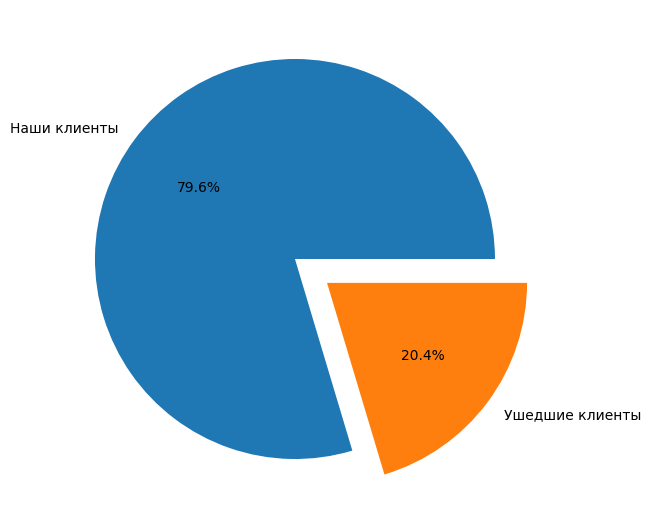

In [4]:
# Задание 9.1
exiteds = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
labels = ['Наши клиенты', 'Ушедшие клиенты']
axes.pie(
    exiteds, 
    labels=labels,
    autopct='%.1f%%',
    explode = [0, 0.2],
);

In [5]:
# На диаграмме видно, что довольно большая часть, а именно 20.4% клиентов перестали пользовоться услугами нашего банка.
# Это 1/5 доля клиентов банка и явный знак, что необходимо предпринимать шаги к уменьшению оттока клиентов. 

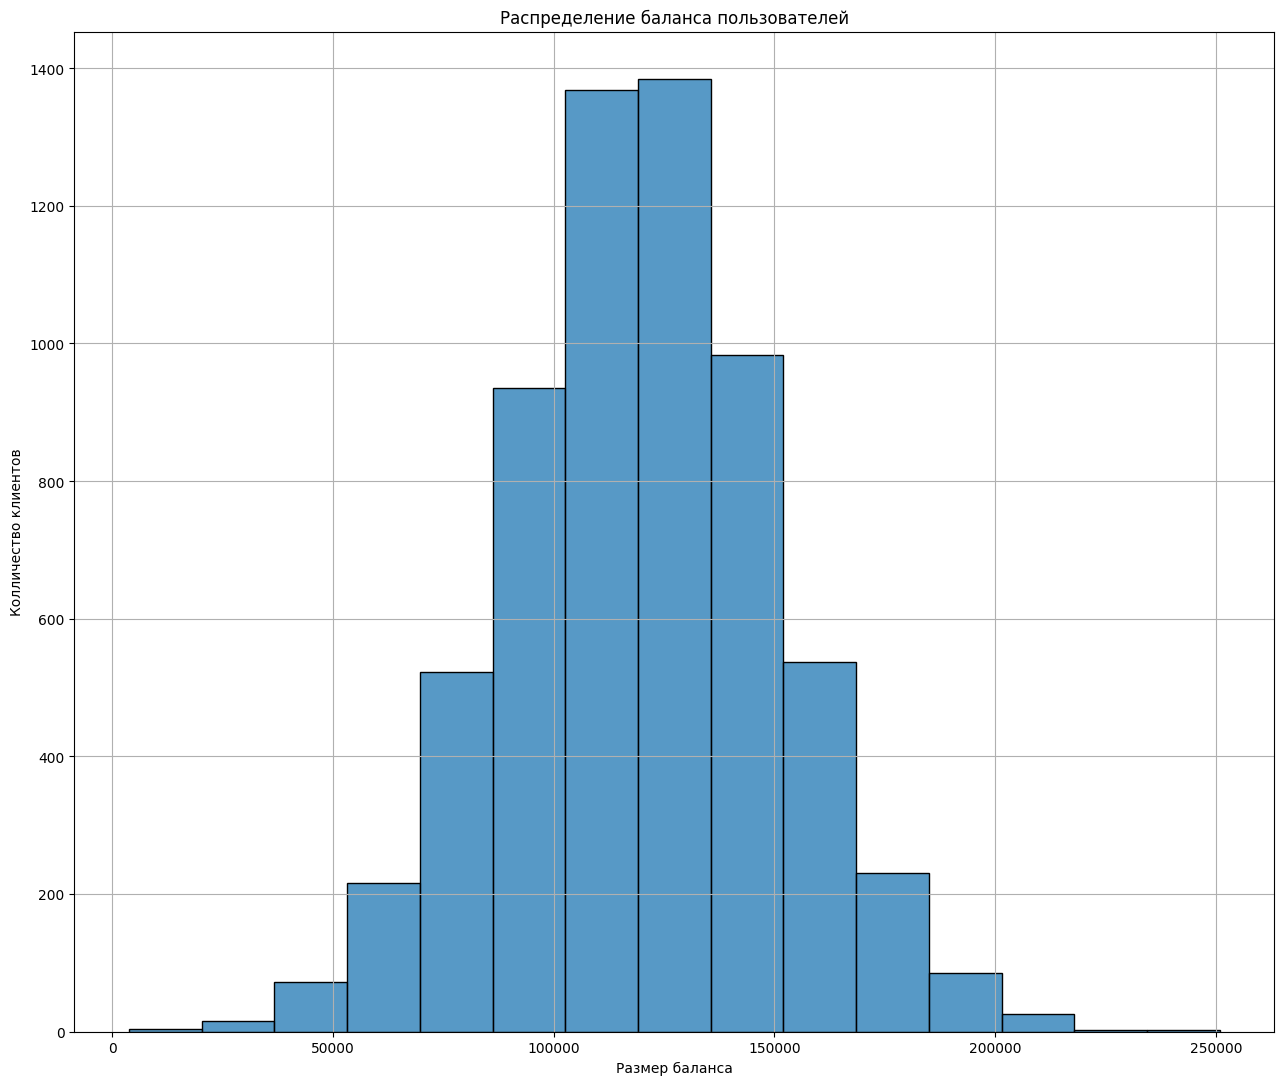

In [6]:
#Задание 9.2
import seaborn as sns
filtered = churn_data[churn_data['Balance'] > 2500]
filtered.min()

fig = plt.figure(figsize = (12, 10))
axes = fig.add_axes([0,0,1,1])
histplot = sns.histplot(
    data=filtered,
    x='Balance',
    bins=15,
)

histplot.set_title('Распределение баланса пользователей');
histplot.set_xlabel('Размер баланса');
histplot.set_ylabel('Колличество клиентов');
histplot.grid()
   
    

In [7]:
#По данному графику можно сделать вывод, что большая часть клиентов  банка, имеет на своем балансе от 100000 до 150000 долларов.
#Так же у большинства клиентов банка на балансе больше 50000 долларов
# Клиентов имеющих баланс больше 200000 доларов на балансе, крайне мала по отношению к основному колличеству клиентов.

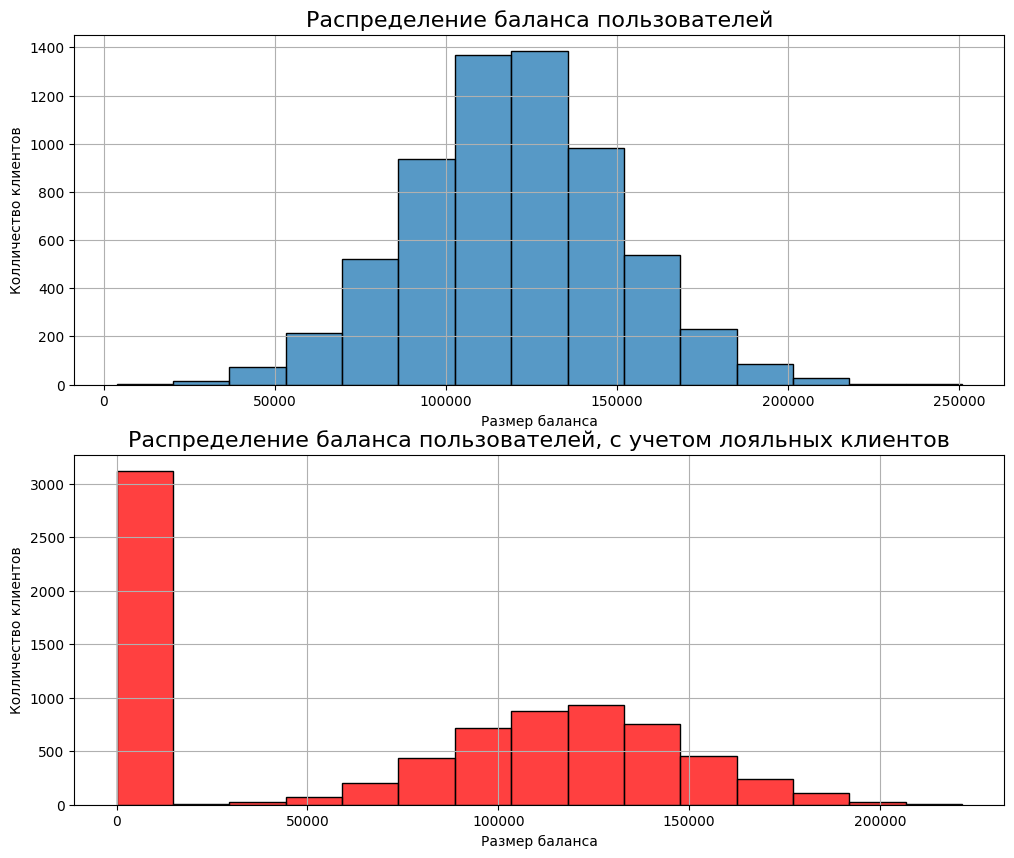

In [8]:
#Задание 9.3
filtered_exited = churn_data[churn_data['Exited']==0]


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
sns.histplot(
    data=filtered,
    x='Balance',
    bins=15,
    ax=axes[0]
);
axes[0].set_title('Распределение баланса пользователей', fontsize=16);
axes[0].set_xlabel('Размер баланса');
axes[0].set_ylabel('Колличество клиентов');
axes[0].grid()

sns.histplot(
    data=filtered_exited,
    x='Balance',
    bins=15,
    color='red',
    ax=axes[1]
);
axes[1].set_title('Распределение баланса пользователей, с учетом лояльных клиентов', fontsize=16);
axes[1].set_xlabel('Размер баланса');
axes[1].set_ylabel('Колличество клиентов');
axes[1].grid()



In [9]:
# Судя по этому графику можно сделать вывод, что среди оставшихся с нами клиентов большая доля клиентов, более 3000 практически не имею средств на балансе или он не превышеает 20000 долларов.
# Так же можно сделать вывод, что клиенты выводят средаства со своего баланса и большинство из них выводят практически по 0. 
# Колличество клиентов среди оставшихся, на балансе которых от 100000 до 1500000 долларов, значительно снизился.
# Судя по всему сохраняется сильный отток клиентов.
# Возможно, банк сильно опустил ставку по вкладу, или происходят какие то сильные политические изменения.

Text(0, 0.5, 'Ушедшие и оставшиеся клиенты')

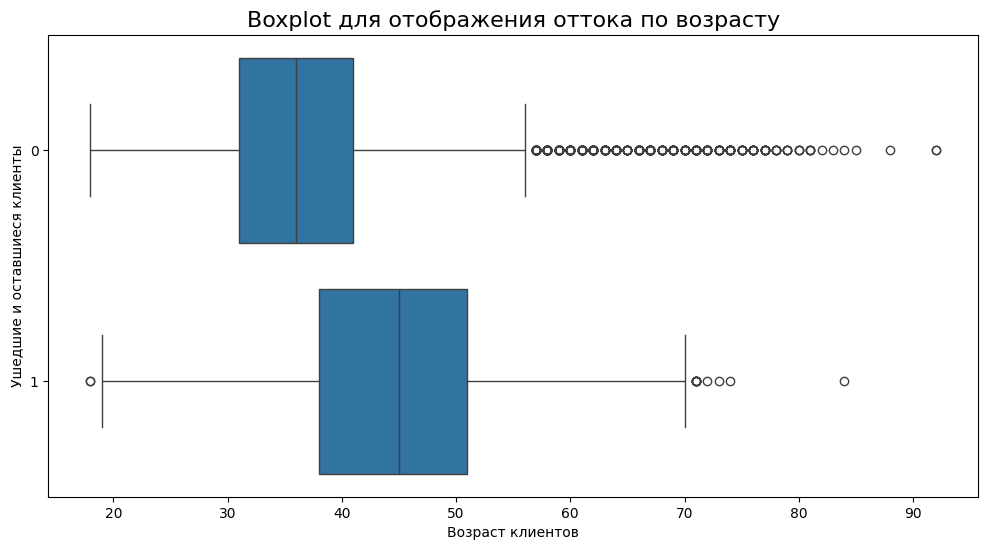

In [10]:
#Задание 9.4


fig = plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(data=churn_data, x = 'Age', y = 'Exited', orient ='h')
boxplot.set_title('Boxplot для отображения оттока по возрасту', fontsize=16)
boxplot.set_xlabel('Возраст клиентов')
boxplot.set_ylabel('Ушедшие и оставшиеся клиенты')



In [11]:
# По данному графику видно, что средний возраст клиентов оставшихся около 36 лет, а ушедших это 45 лет. Соответственно можно сделать вывод, что покидает банк группа клиентов возрастом выше 40 лет. Акцент для удержания клиентов, нужно делать именно на них.
# Очень большое количество выбросов в данных наблюдается у оставшихся клиентов, что говорит о необходимости допроверить данные.

Text(0, 0.5, 'Предпологаемая зарплата')

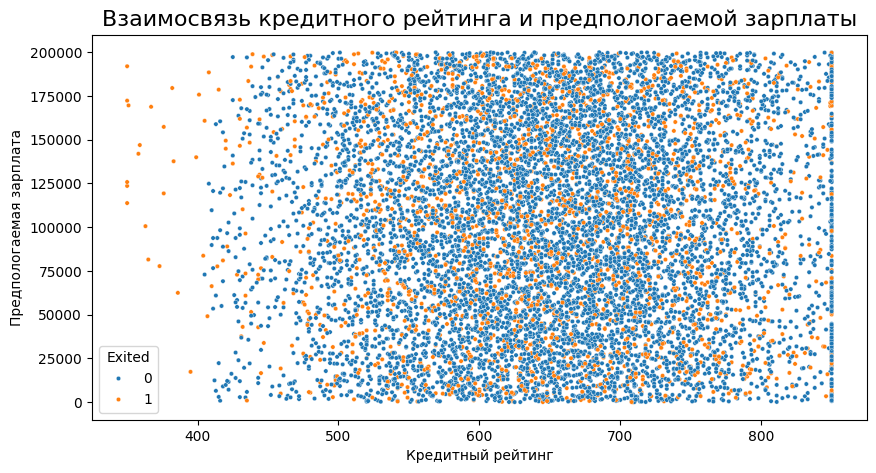

In [12]:

fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    s=10
)
scatterplot.set_title('Взаимосвязь кредитного рейтинга и предпологаемой зарплаты', fontsize=16)
scatterplot.set_xlabel('Кредитный рейтинг')
scatterplot.set_ylabel('Предпологаемая зарплата')

In [13]:
#По графику можно сделать вывод, что взаимосвязь между этими двумя числовыми признаками отсутствует.

In [14]:
#Задание 9.6

import plotly
import plotly.express as px

groupted_exited = churn_data.groupby('Gender', as_index=False)['Exited'].mean()

fig = px.bar(
    data_frame=groupted_exited, 
    x="Gender", 
    y="Exited", 
    text = 'Gender', 
    color = 'Exited',
    orientation='v', 
    height=500,
    width=650, 
    title='График доли ушедших по половому признаку' 
)


fig.show()

In [15]:
#Данный график иллюстрирует, что женская часть клиентов уходят значительно чаще чем, мужская.

In [16]:
#Задание 9,7
churn_data['Loyal'] = 1 - churn_data['Exited']
grouped_by_exit = churn_data.groupby(['NumOfProducts'])[['Exited', 'Loyal']].sum()


fig = px.bar(
    data_frame=grouped_by_exit,
    x=grouped_by_exit.index,
    y=['Exited', 'Loyal'],
    height=500, 
    width=700, 
    title='Взаимосвязь оттока клиентов и числа приобретённых услуг'
)

fig.show()

In [17]:
#Большинство клиентов имеют или 1 продукт банк или 2 продукта и очень малая доля клиентов имеют 3 и 4 продукта.
#Соответственно и доля ушедших клиентов самые большие именно имеющих 1 и 2 продукта
#Однако нужно заметить, что ушедших доля ушедших клиентов имеющих по 2 продукта значительно ниже, чем клиентов, которые имели 1 продукт, можно сделать вывод, что можно для возможного удержания клентов желательно, что бы клиенты имели по 2 продукта.
#По 3 и 4 продукта имели незначительно колличество клиентов, но тем ни менее практически все клиенты имеющие по 3 или 4 продукта, ушли.

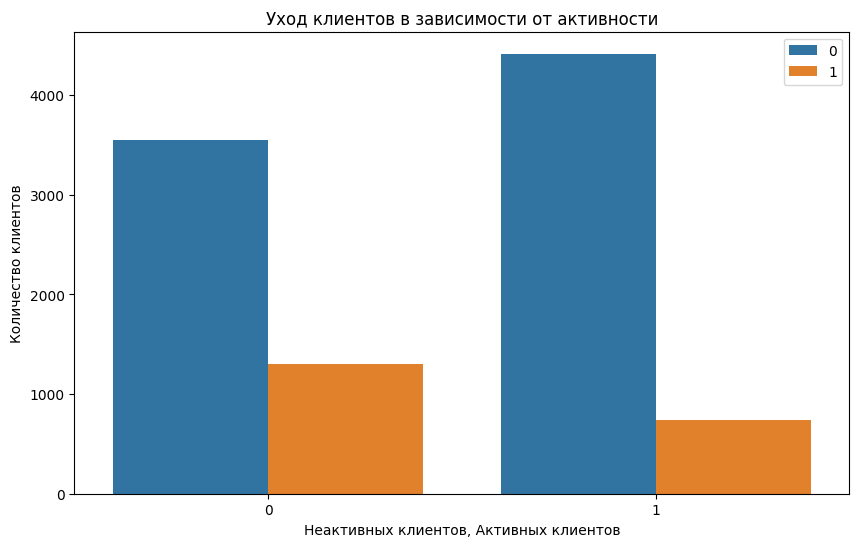

In [18]:
# Задание 9.8

services_data = churn_data.groupby(['IsActiveMember', 'Exited']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(x='IsActiveMember', y='Count', hue='Exited', data=services_data)
plt.title('Уход клиентов в зависимости от активности')
plt.xlabel('Неактивных клиентов, Активных клиентов')
plt.ylabel('Количество клиентов')
plt.legend()
plt.show()


In [19]:
#График показывает, что у части активных клиентов число оставшихся клиентов больше, чем в числе неактивных
#Так же число ушедших клиентов среди активных клиентов меньше, напрашивается вывод, что банку нужно повышать колличество активных клиентов 



In [20]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyal
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1


In [21]:
#Задание 9.9
choropleth_data = churn_data.groupby('Geography')['Exited'].mean()

#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #DataFrame
    locations=choropleth_data.index, #столбец с локациями
    locationmode = "country names",
    color="Exited", #от чего зависит цвет
    range_color=[0, 0.35], #диапазон цвета
    title='Доля ушедших клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Blues' #палитра цветов
)

#отображаем график
fig.show()

In [22]:
#Наибольшая доля ушедших выходит Германию, когда как в Испании и Франции доля меньше и она примерно одинакова. Возможно это связано с какими то политическими особенностями госудраства.

In [23]:
#Задание 9.10 
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat']=churn_data['CreditScore'].apply(get_credit_score_cat)


In [24]:
pivot_of_exited = churn_data.pivot_table(values = 'Exited', index = 'CreditScoreCat', columns = 'Tenure',aggfunc='mean')
display(pivot_of_exited)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


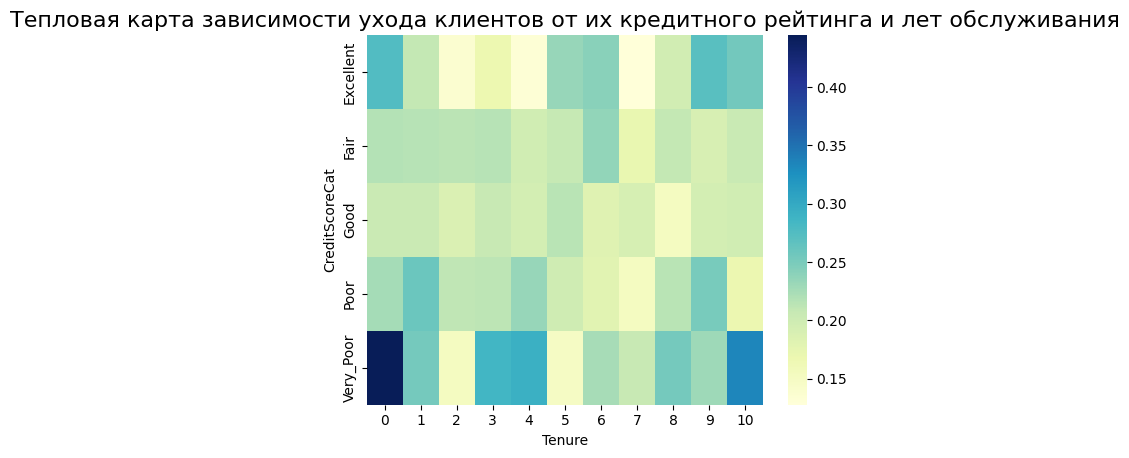

In [25]:
heatmap = sns.heatmap(data=pivot_of_exited, cmap='YlGnBu')
heatmap.set_title('Тепловая карта зависимости ухода клиентов от их кредитного рейтинга и лет обслуживания', fontsize=16);

In [26]:
# по тепловой диаграмме видно, что чаще все покидают банк до года обслуживания и с самым плохим кредитным рейтингом